<a href="https://colab.research.google.com/github/navinabalab2007-ux/car_rental/blob/main/rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib


In [ ]:
df=pd.read_csv("CarRentalData.csv")
print(df.head())

   fuelType  rating  renterTripsTaken  reviewCount location.city  \
0  ELECTRIC    5.00                13           12       Seattle   
1  ELECTRIC    5.00                 2            1       Tijeras   
2    HYBRID    4.92                28           24   Albuquerque   
3  GASOLINE    5.00                21           20   Albuquerque   
4  GASOLINE    5.00                 3            1   Albuquerque   

  location.country  location.latitude  location.longitude location.state  \
0               US          47.449107         -122.308841             WA   
1               US          35.111060         -106.276551             NM   
2               US          35.127163         -106.566681             NM   
3               US          35.149726         -106.711425             NM   
4               US          35.208659         -106.601008             NM   

   owner.id  rate.daily vehicle.make vehicle.model vehicle.type  vehicle.year  
0  12847615         135        Tesla       Model X    

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

In [ ]:
target= "rate.daily"

In [ ]:
features=["fuelType", "rating", "renterTripsTaken", "reviewCount",
       "location.city", "location.country", "location.latitude",
       "location.longitude", "location.state", "owner.id",
       "vehicle.make", "vehicle.model", "vehicle.type", "vehicle.year"]

In [ ]:
df=df[features+[target]].dropna()

In [ ]:
le=LabelEncoder()
df["fuelType"]=le.fit_transform(df["fuelType"])

In [ ]:
df['location.city']=le.fit_transform(df['location.city'])
df['location.country']=le.fit_transform(df['location.country'])
df['location.state']=le.fit_transform(df['location.state'])
df['vehicle.make']=le.fit_transform(df['vehicle.make'])
df['vehicle.model']=le.fit_transform(df['vehicle.model'])
df['vehicle.type']=le.fit_transform(df['vehicle.type'])

In [ ]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,1,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,1,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,3,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,2,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,2,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [ ]:
x=df[features]
y=df[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestRegressor(n_estimators=200,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 SCORE:",r2)

MSE: 4567.449388988658
RMSE: 67.58290752097498
R2 SCORE: 0.4769128593284333


<function matplotlib.pyplot.show(close=None, block=None)>

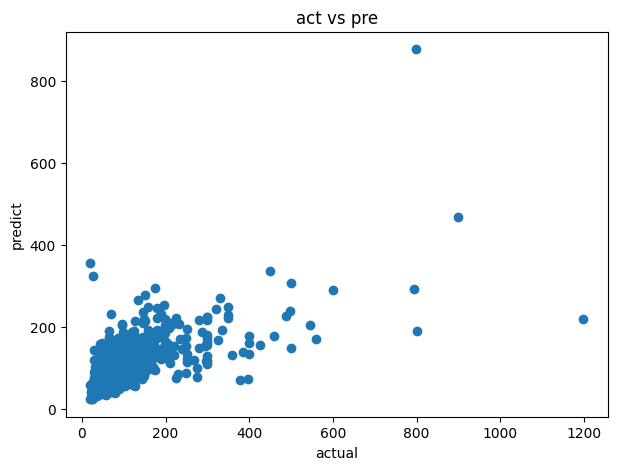

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predict")
plt.title("act vs pre")
plt.show

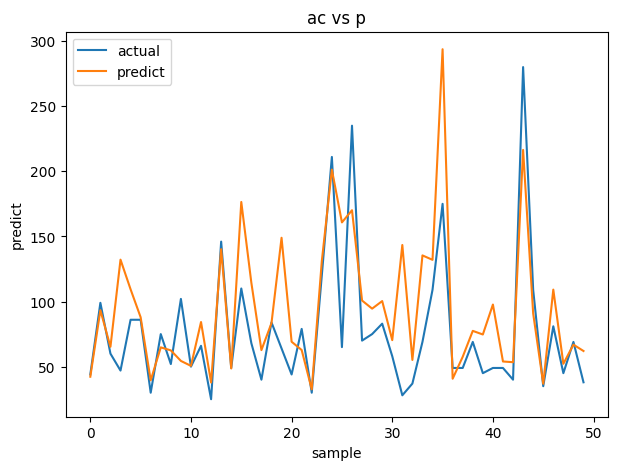

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(y_test.values[:50],label="actual")
plt.plot(y_pred[:50],label="predict")
plt.xlabel("sample")
plt.ylabel("predict")
plt.title("ac vs p")
plt.legend()
plt.show()

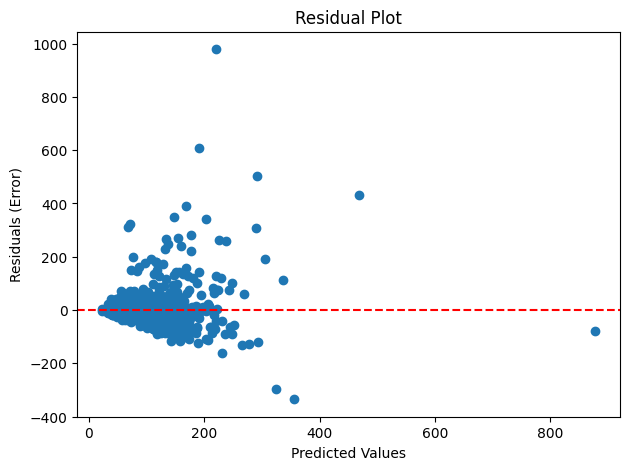

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


In [ ]:
loaded_model=joblib.load("model.pkl")
pred=loaded_model.predict(x_test)
print(pred)

[ 42.275  93.355  65.23  ...  50.34  113.87   31.93 ]
